In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Conect dataframe
from google.colab import drive
drive.mount('/content/drive')
my_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labs Unidad 4/marketing_customer_analysis.csv')

Mounted at /content/drive


In [3]:
# Display the first few rows
print(my_data.head())

# Display the shape of the dataframe
print(my_data.shape)

# Display information about the dataframe
print(my_data.info())


  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [4]:
# Rename columns
my_data.columns = my_data.columns.str.lower().str.replace(' ', '_')

In [5]:
# Fix the date
my_data['effective_to_date'] = pd.to_datetime(my_data['effective_to_date'])

<ipython-input-6-f128340eb6cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = my_data.corr()


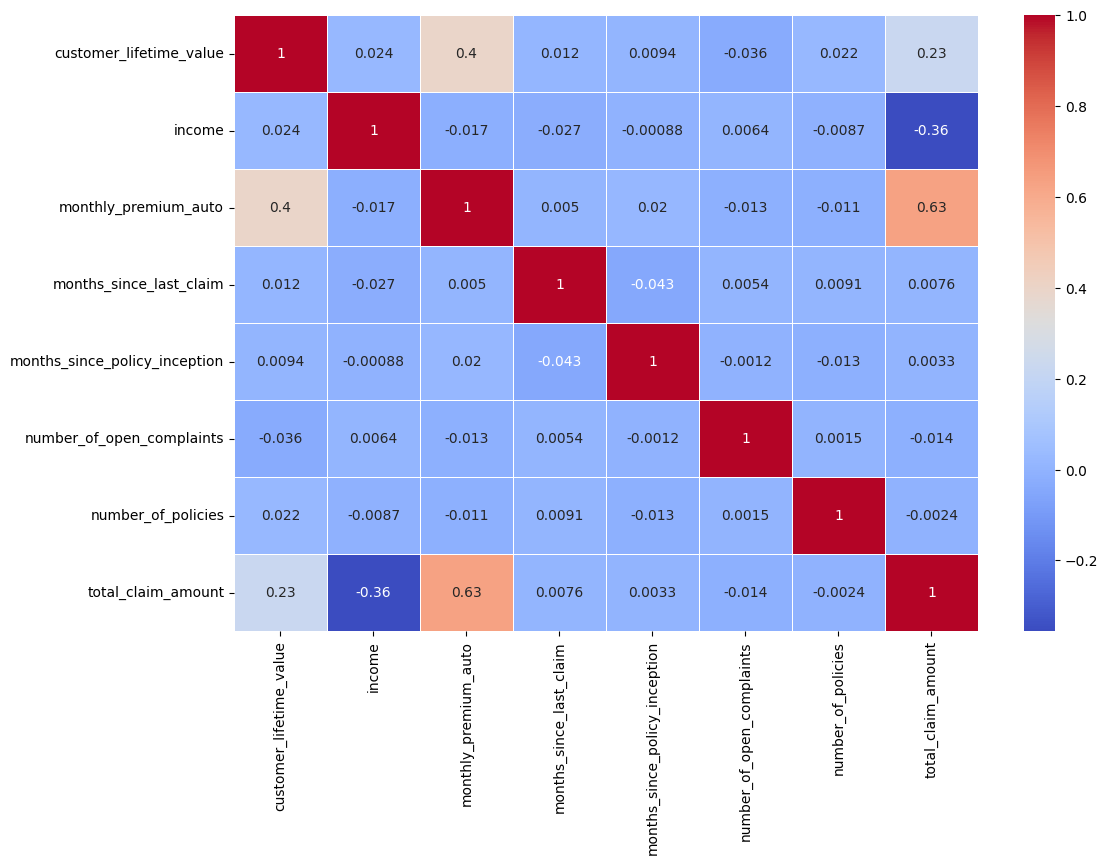

In [6]:
# Correlation matrix
correlation_matrix = my_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


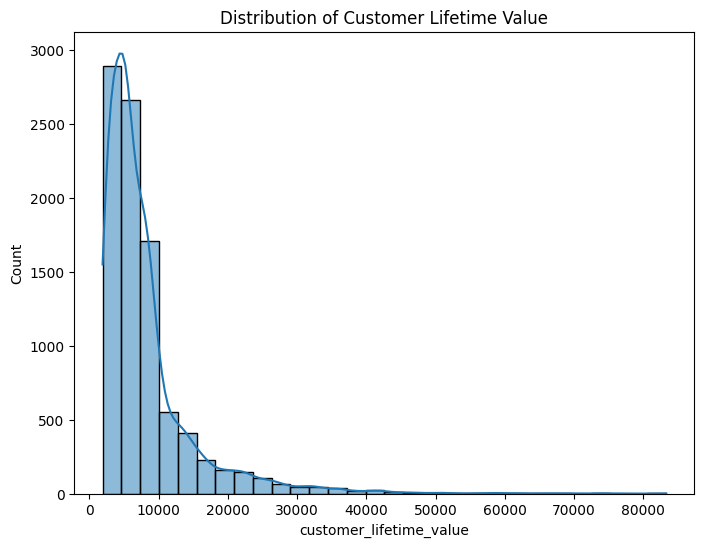

In [7]:
# Continous variable
plt.figure(figsize=(8, 6))
sns.histplot(my_data['customer_lifetime_value'], bins=30, kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.show()


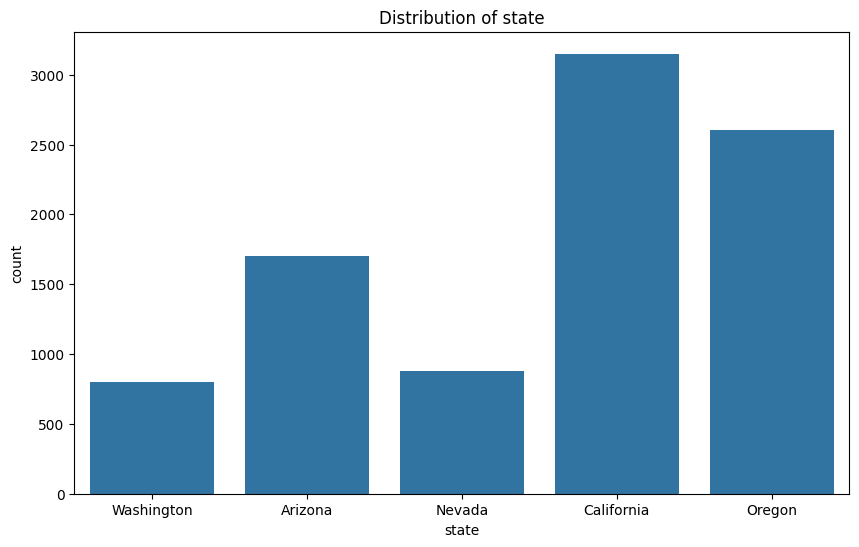

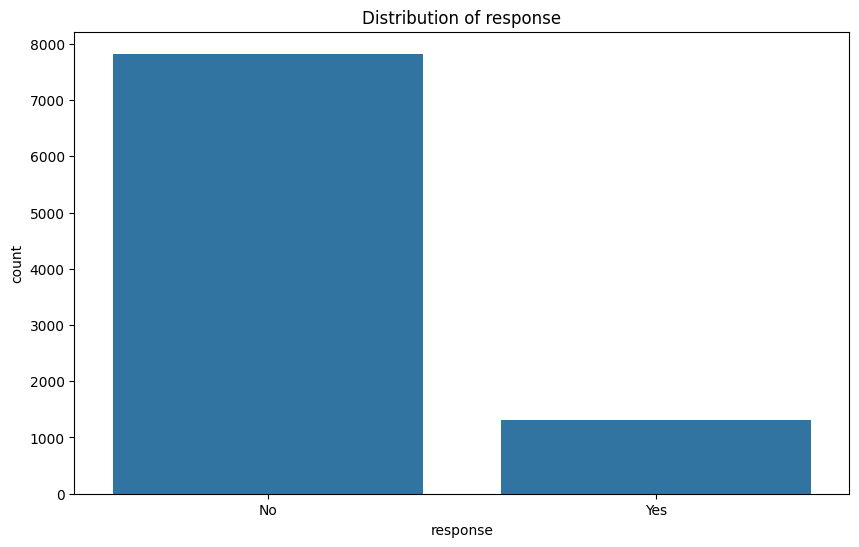

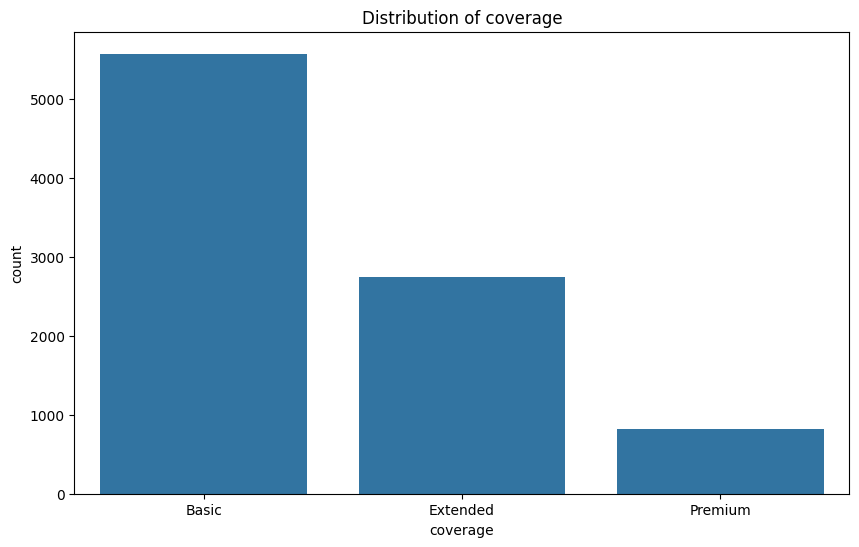

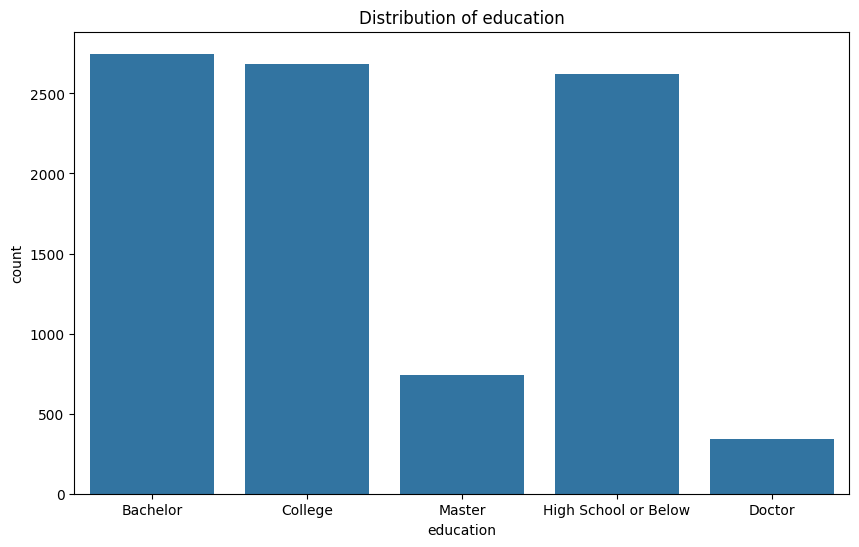

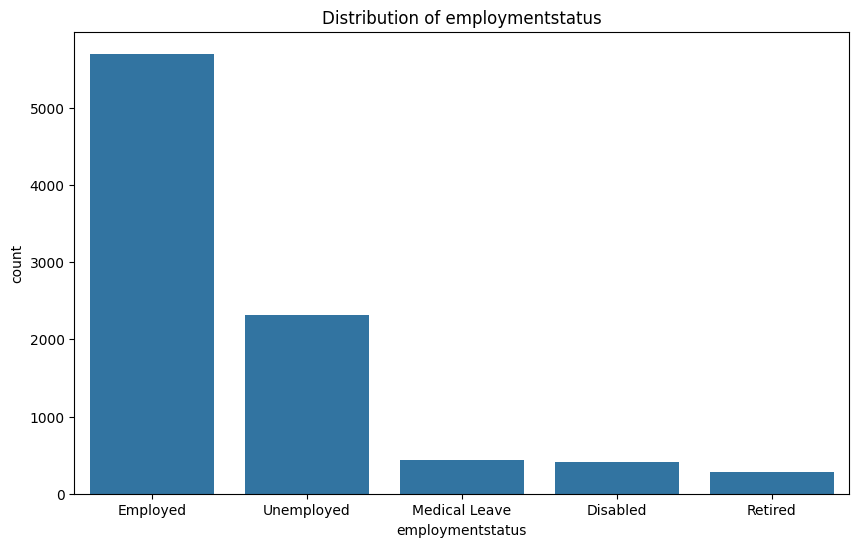

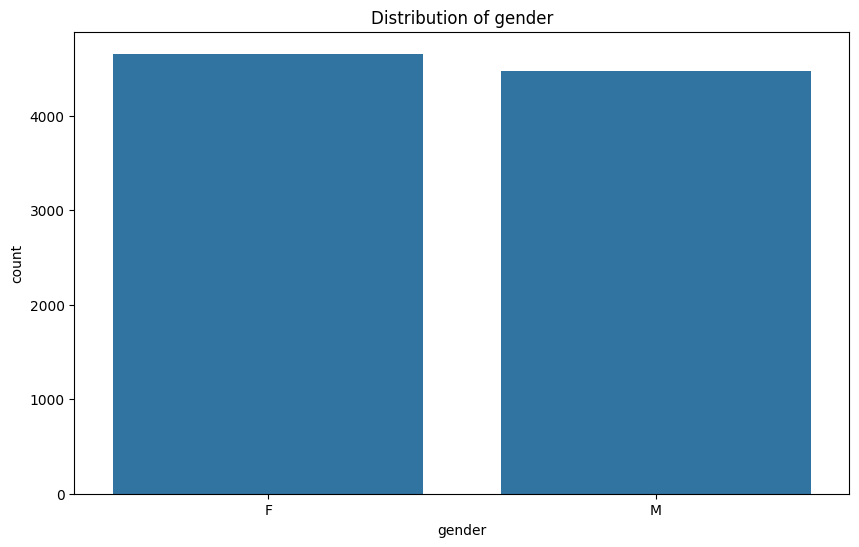

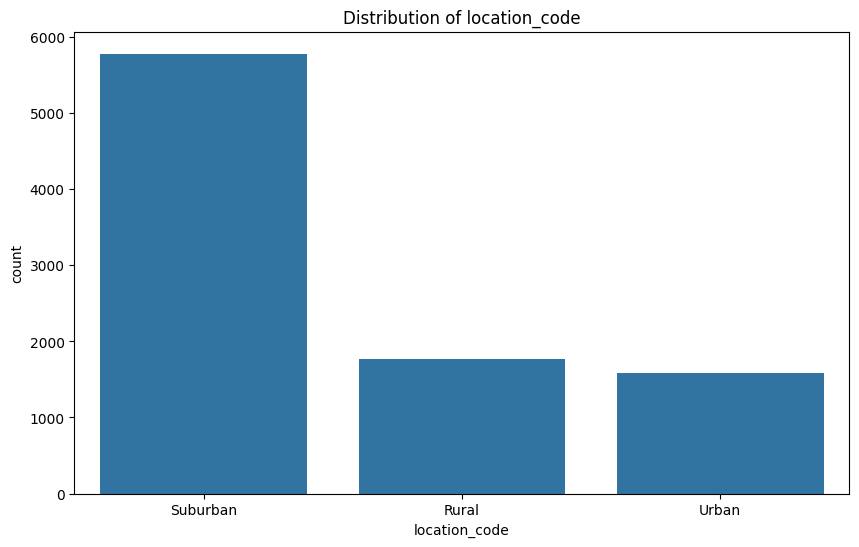

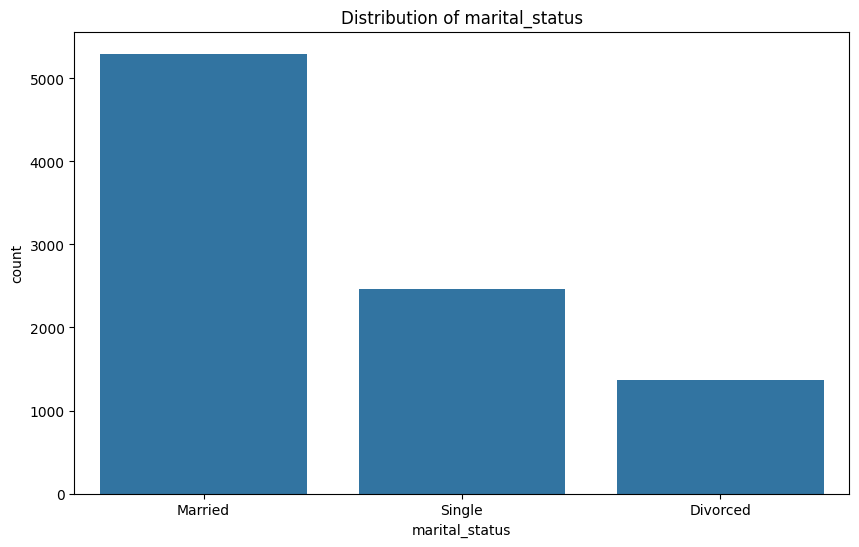

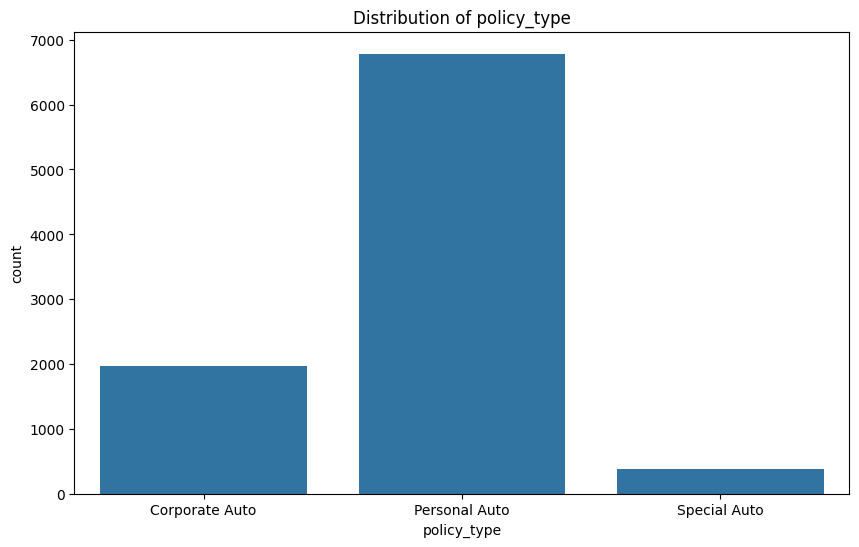

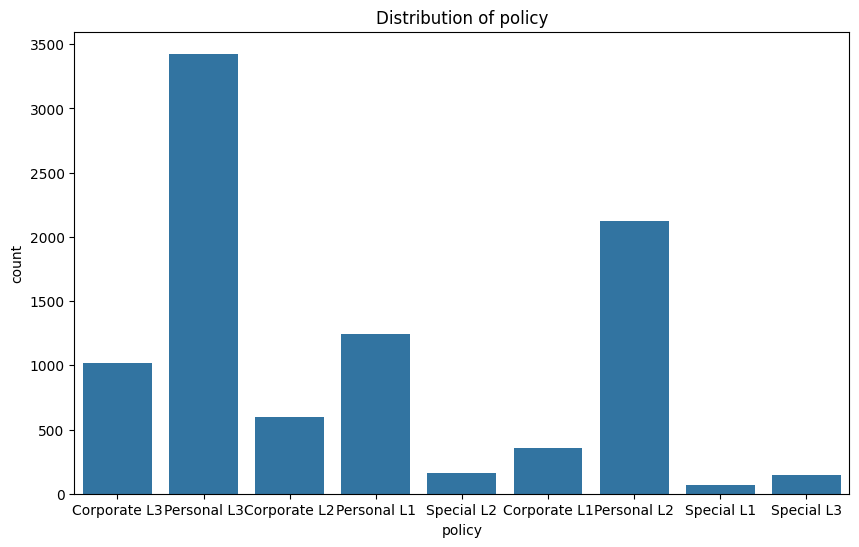

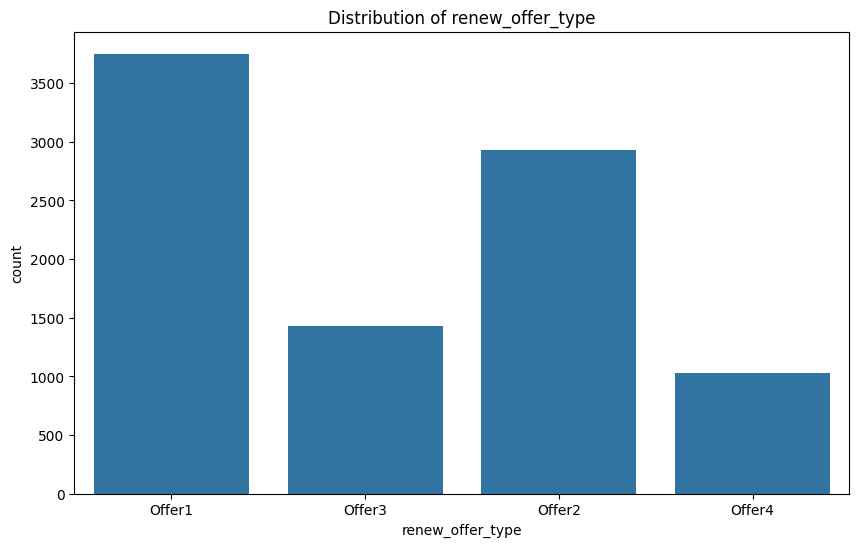

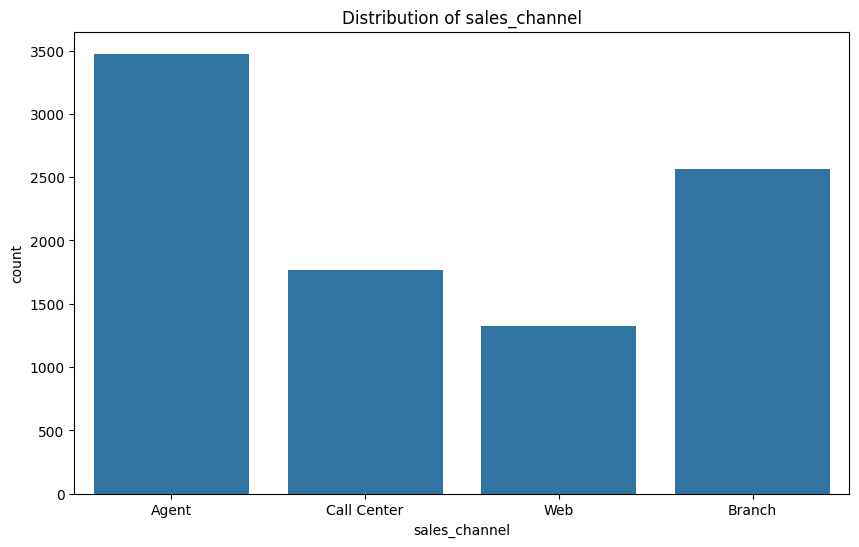

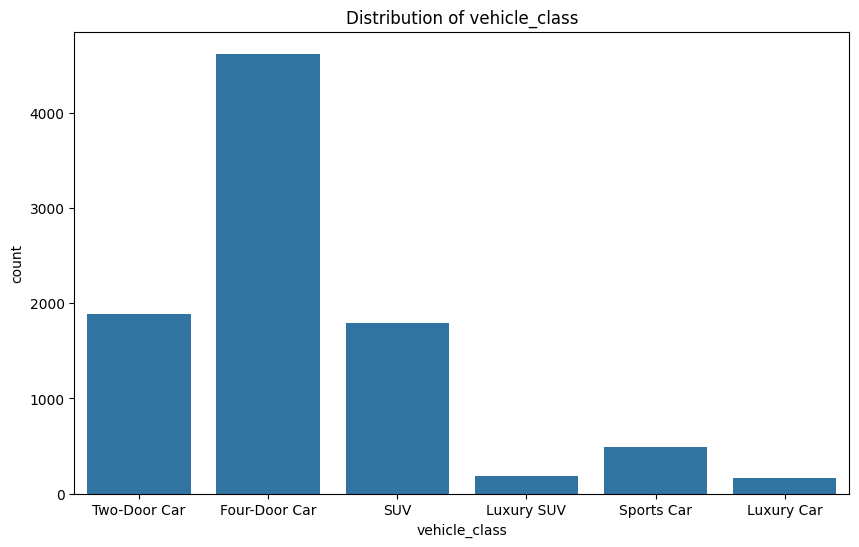

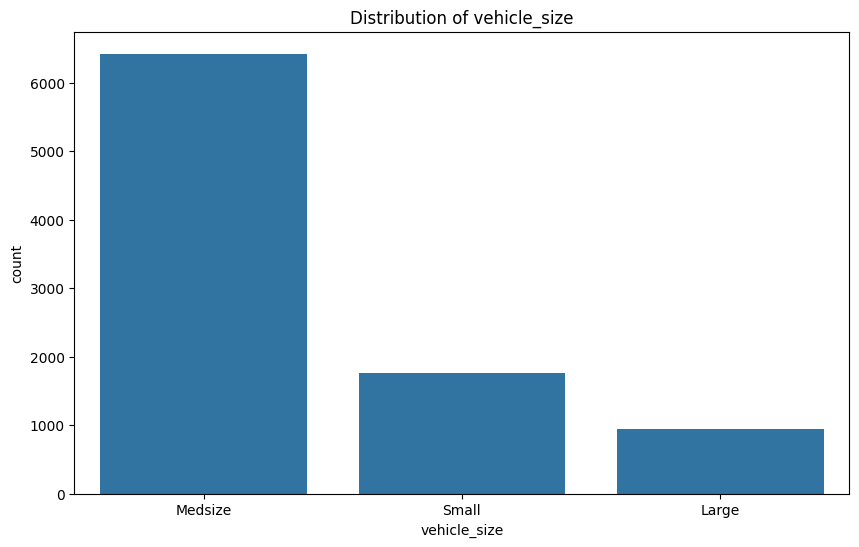

In [8]:
# Delete customer_id
my_data.drop('customer', axis=1, inplace=True)

# Plot categorical variables
for column in my_data.select_dtypes('object').columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=my_data)
    plt.title(f'Distribution of {column}')
    plt.show()

# It is usually deleted because customers are unique identifiers and do not provide meaningful information for analysis. Keeping it in the analysis might lead to overfitting or misinterpretation.

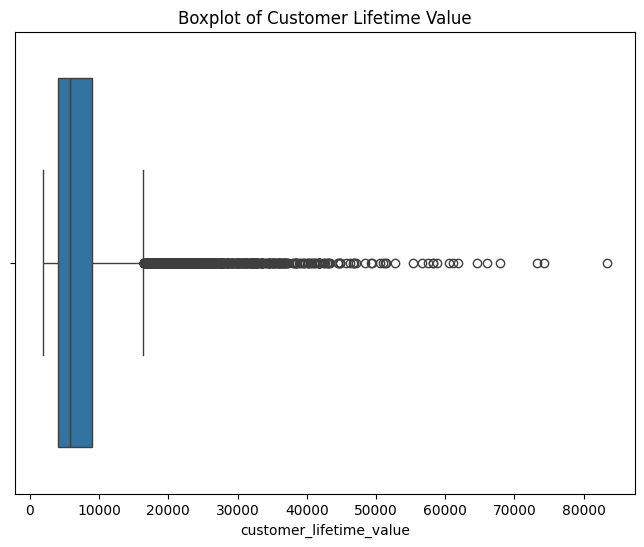

In [9]:
# Look for outliers in countinous variables
plt.figure(figsize=(8, 6))
sns.boxplot(x=my_data['customer_lifetime_value'])
plt.title('Boxplot of Customer Lifetime Value')
plt.show()


In [10]:
# Check for NaN values
print(my_data.isnull().sum())


state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [11]:
# Categorical data cleaning

numerical_df = my_data.select_dtypes(include=[np.number])
categorical_df = my_data.select_dtypes(include=[np.object])


<ipython-input-11-49de45a35a20>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = my_data.select_dtypes(include=[np.object])


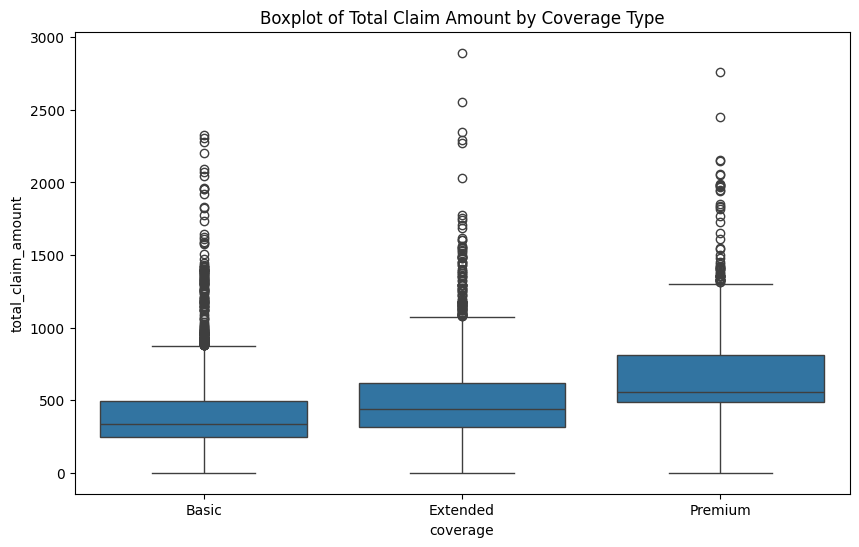

In [12]:
# Plot categorical variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='coverage', y='total_claim_amount', data=my_data)
plt.title('Boxplot of Total Claim Amount by Coverage Type')
plt.show()

In [13]:
# Check for data cleaning in categorical data
for column in categorical_df.columns:
    print(my_data[column].value_counts())


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


In [16]:
# Ploting categorical values
categoricals = my_data.select_dtypes(np.object)
categoricals.head()

<ipython-input-16-b3bd4e73629f>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = my_data.select_dtypes(np.object)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


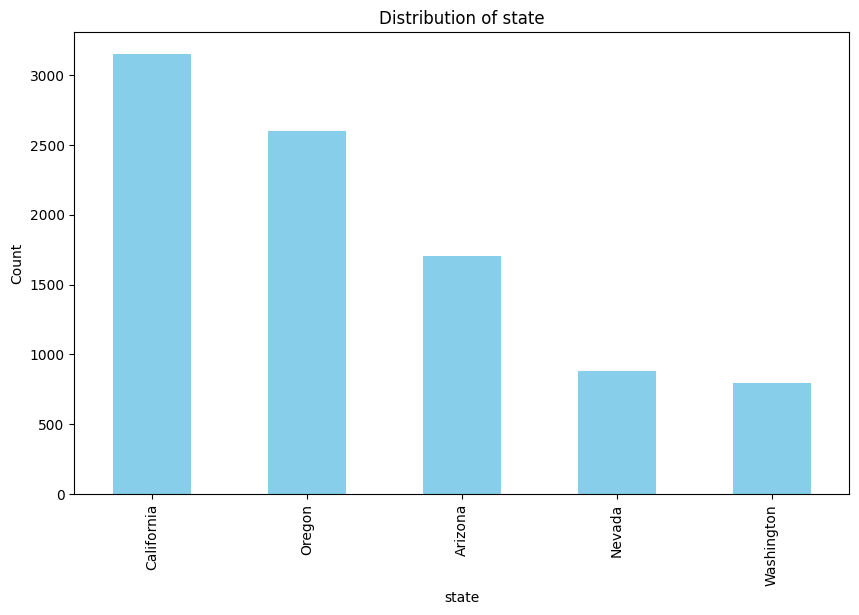

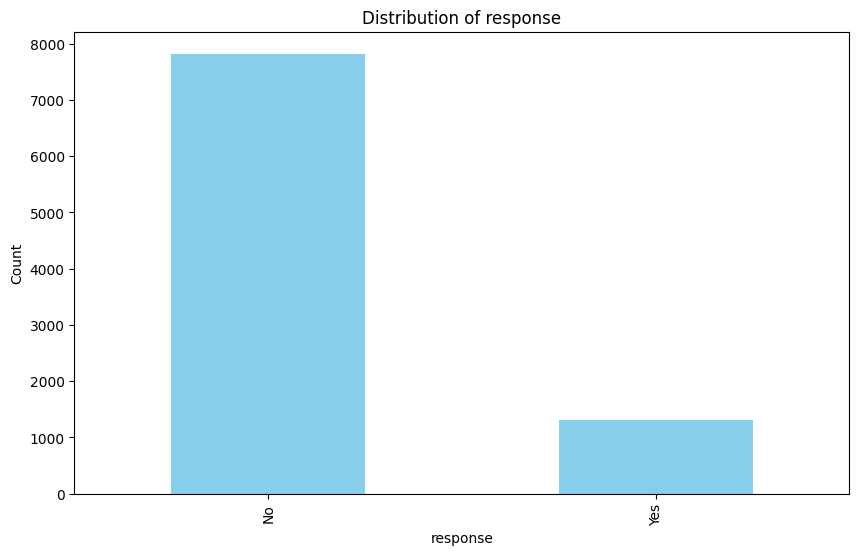

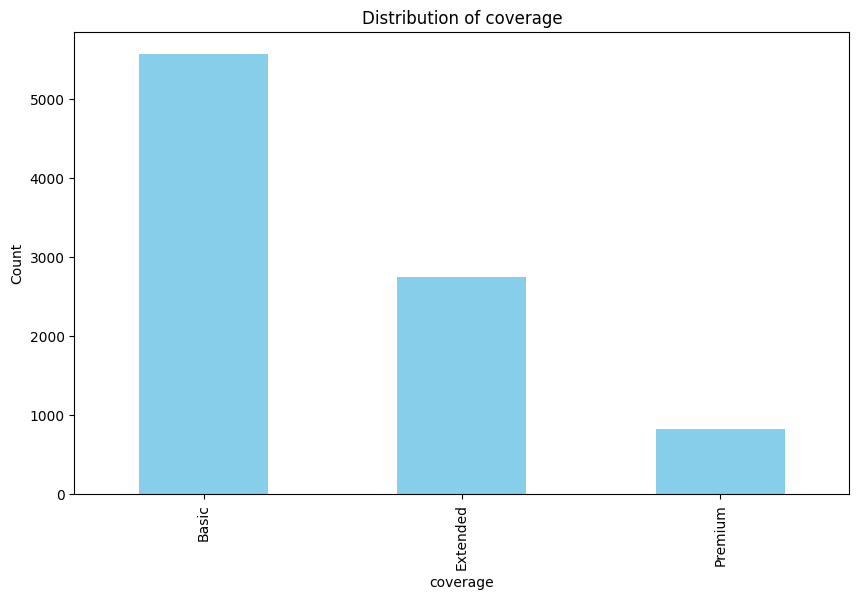

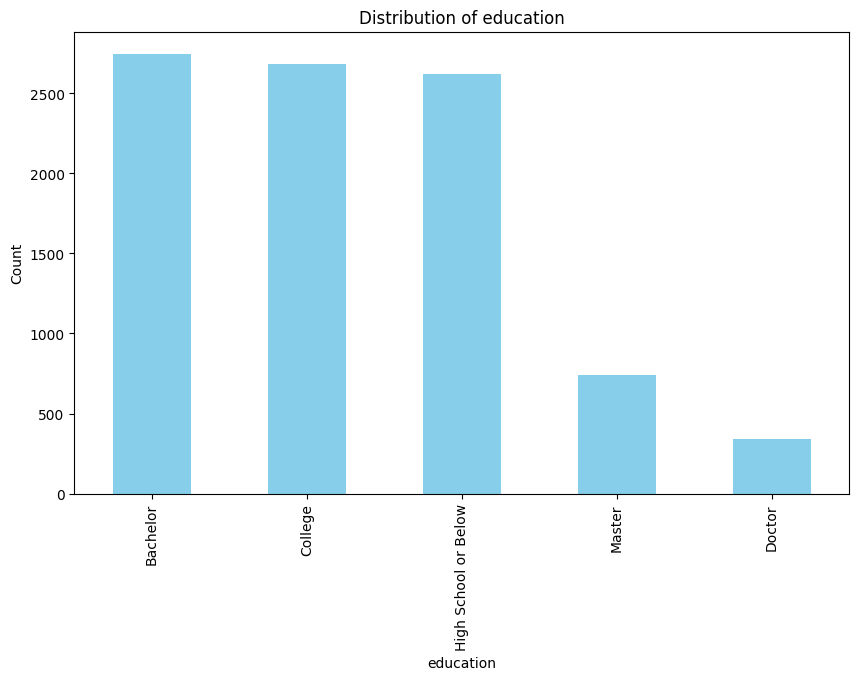

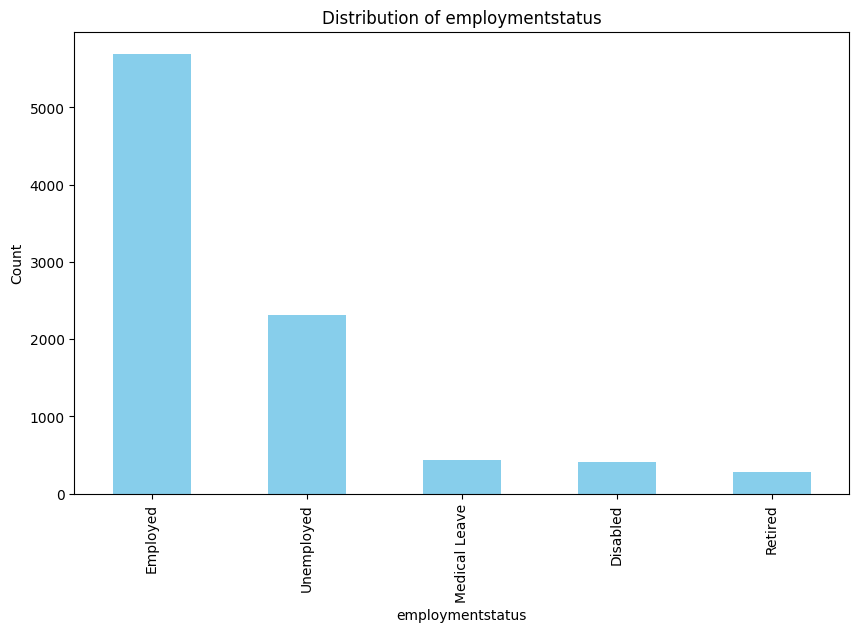

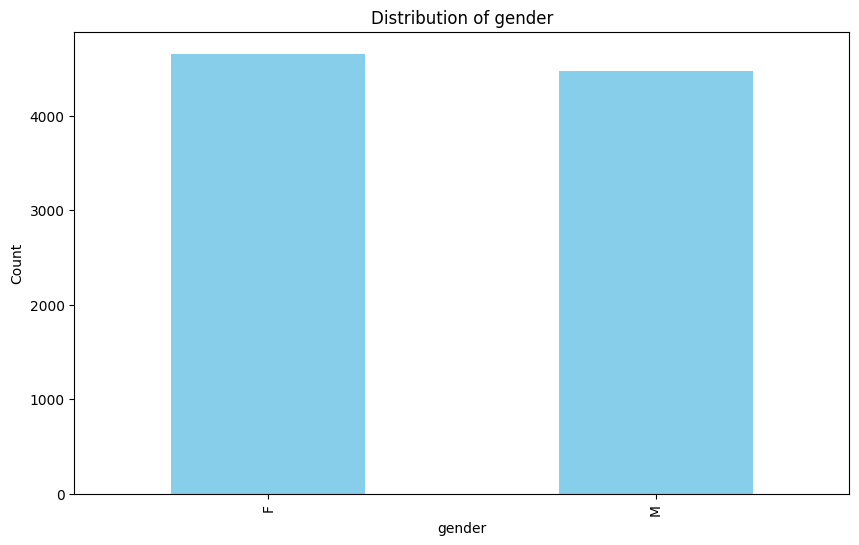

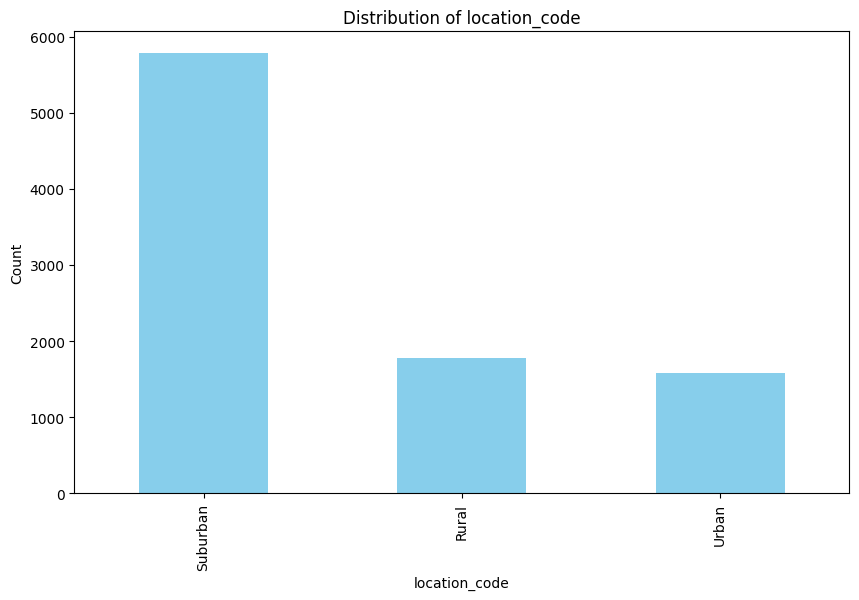

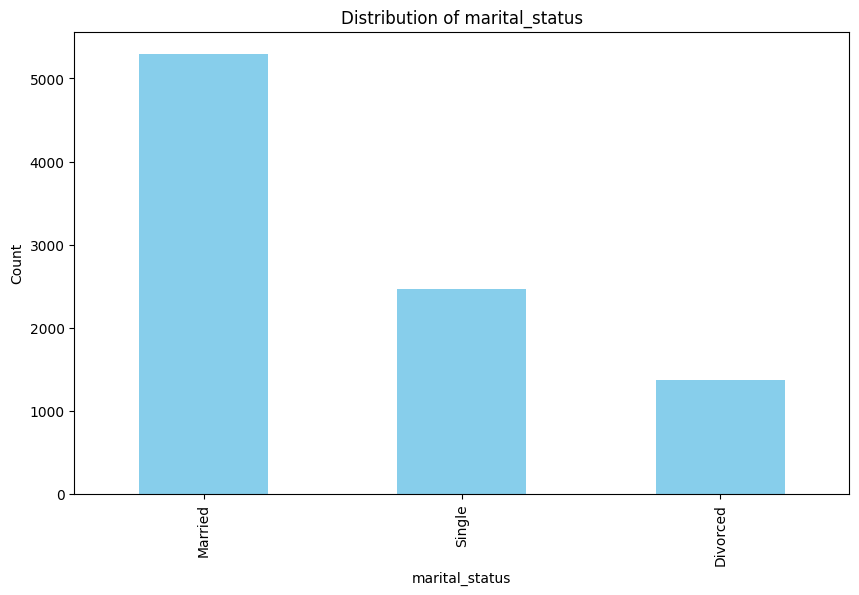

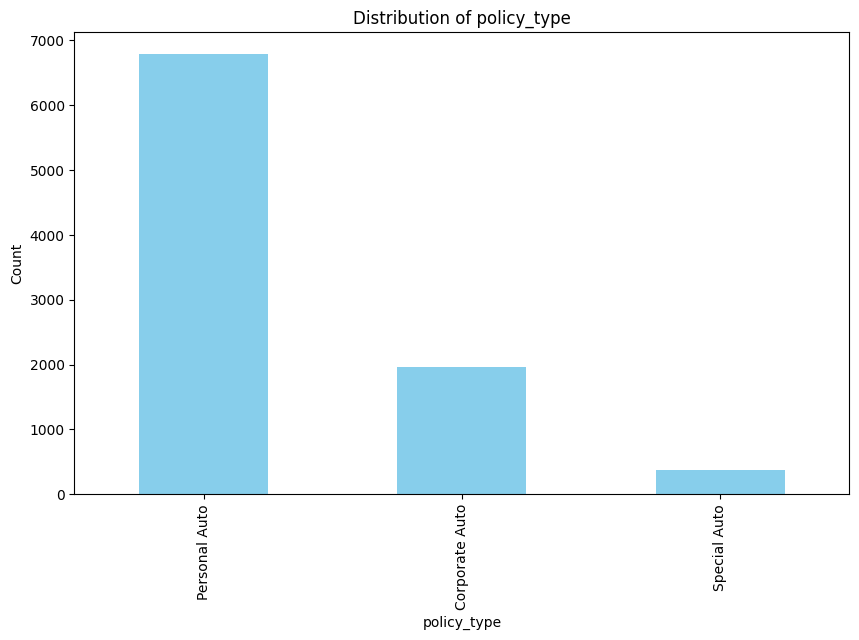

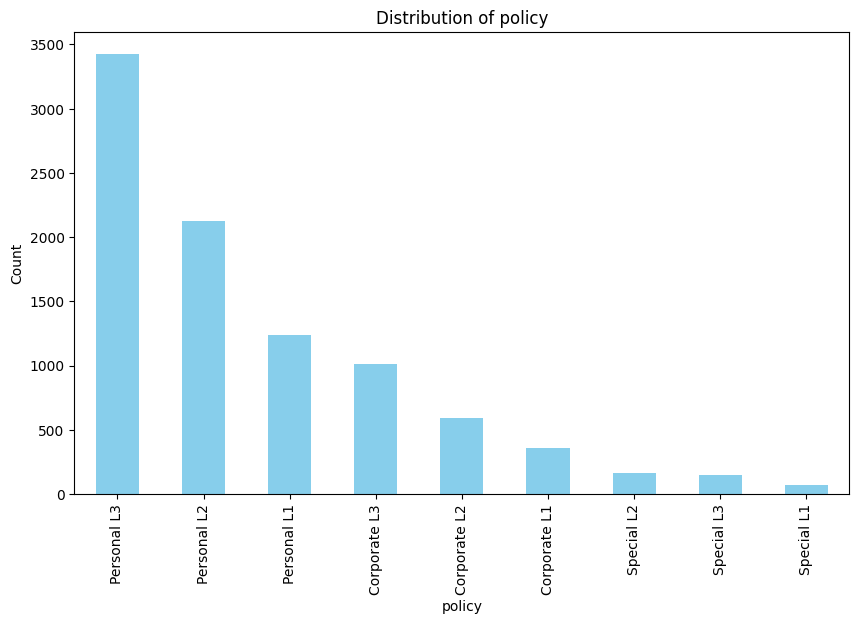

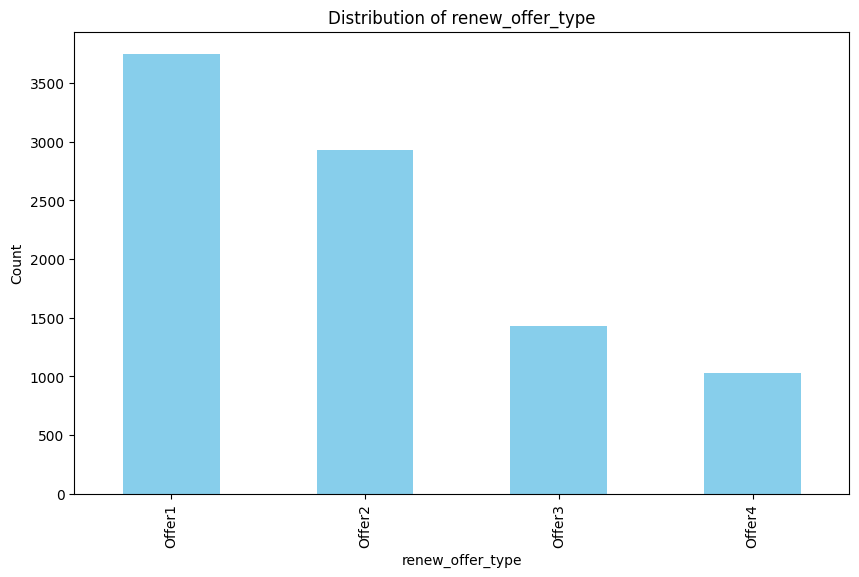

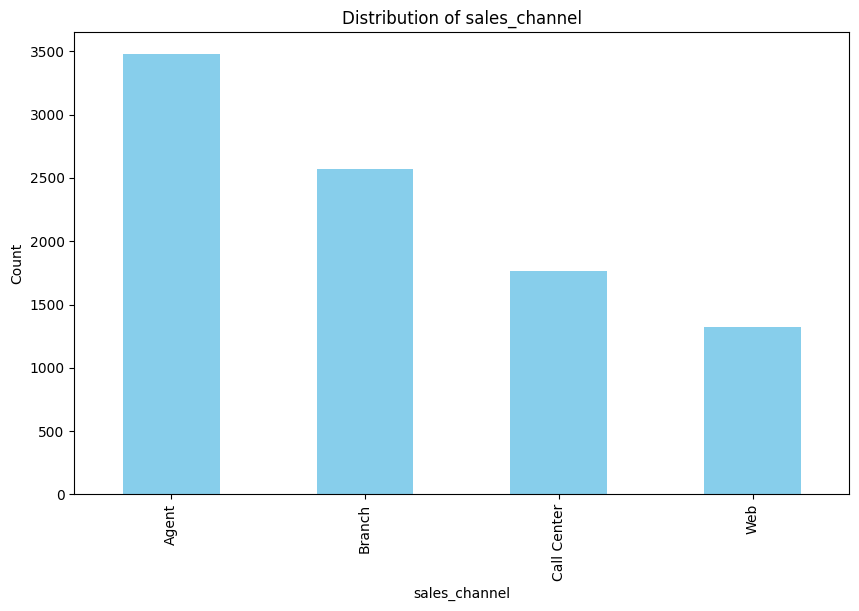

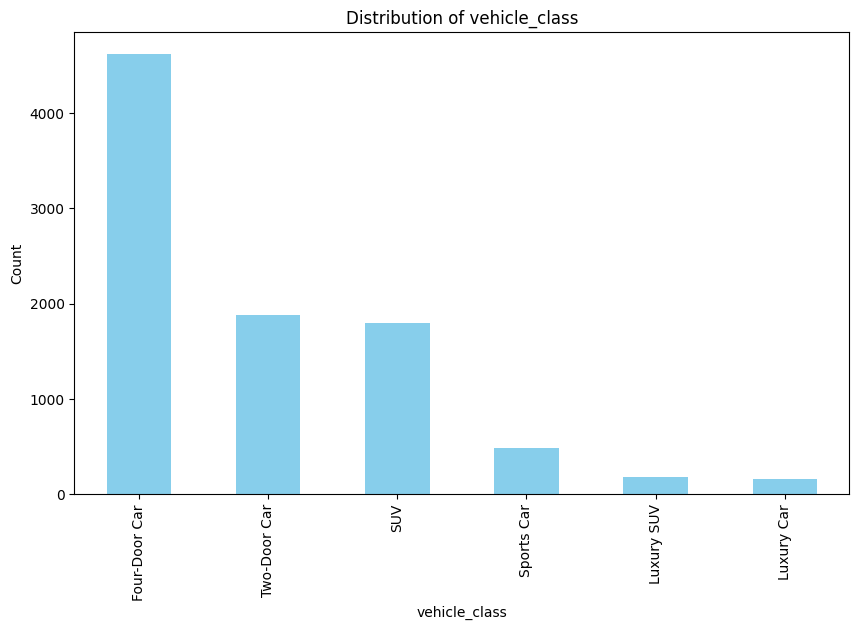

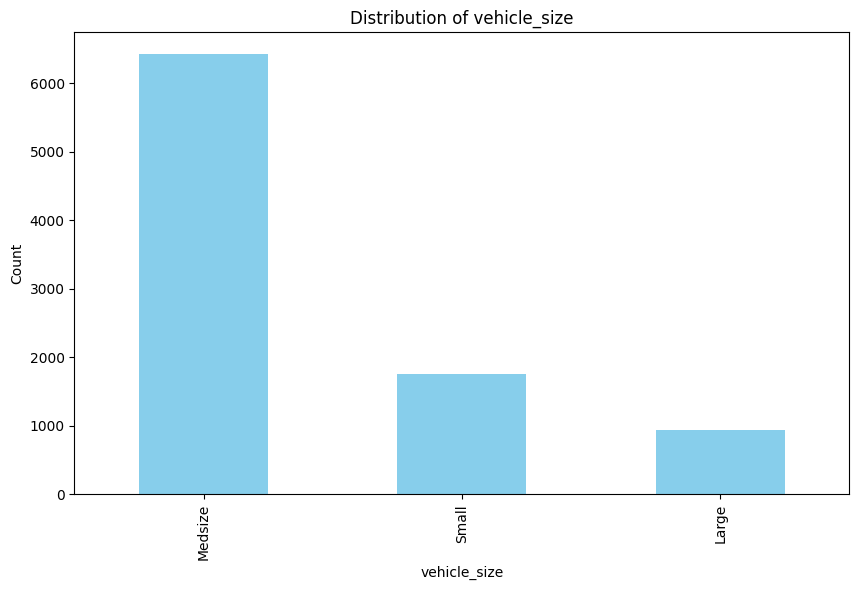

Unique values in state: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique values in response: ['No' 'Yes']
Unique values in coverage: ['Basic' 'Extended' 'Premium']
Unique values in education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique values in employmentstatus: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique values in gender: ['F' 'M']
Unique values in location_code: ['Suburban' 'Rural' 'Urban']
Unique values in marital_status: ['Married' 'Single' 'Divorced']
Unique values in policy_type: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Unique values in policy: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Unique values in renew_offer_type: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
Unique values in sales_channel: ['Agent' 'Call Center' 'Web' 'Branch']
Unique values in vehicle_class: ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Ca

In [19]:
# Plot all categorical variables
for column in categoricals.columns:
    plt.figure(figsize=(10, 6))
    my_data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Check for redundant columns by examining unique values
for column in categoricals.columns:
    print(f"Unique values in {column}: {my_data[column].unique()}")


# We can see some insights in the data, most of them are actually interesting to plot. The distribution on some plots are quite revealing to know more about the decisions and preferences of the customers.


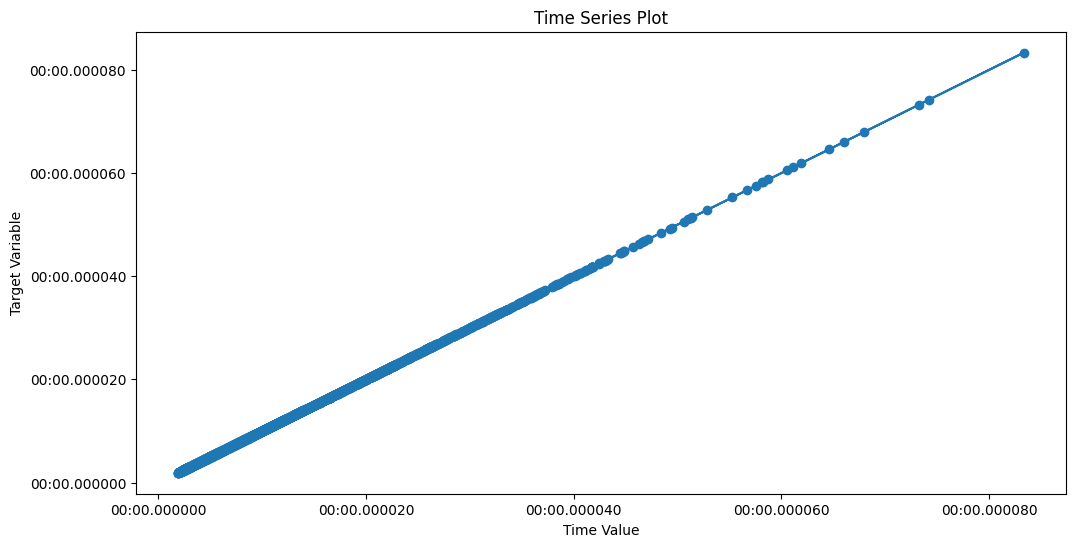

In [20]:
# Plot time variable
# Assuming 'time_variable' is the name of your time variable column
time_variable = my_data['customer_lifetime_value']

# Convert time_variable to datetime if it's not already
my_data['customer_lifetime_value'] = pd.to_datetime(my_data['customer_lifetime_value'])

# Plot time series if applicable
plt.figure(figsize=(12, 6))
plt.plot(my_data['customer_lifetime_value'], my_data['customer_lifetime_value'], marker='o', linestyle='-')
plt.title('Time Series Plot')
plt.xlabel('Time Value')
plt.ylabel('Target Variable')
plt.show()

# We can observe from a customer lifetime value its similar to a linera regresion exponentialy growing.